<a href="https://colab.research.google.com/github/gitflai/TrilhaTestesAB/blob/main/Aula_3_1_Nocoes_de_Inferencia_Simulacao_de_uma_Pesquisa_Eleitoral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trilha de Aprofundamento: **Testes A/B**

Curso 3/5: **Noções de Inferência Estatística**

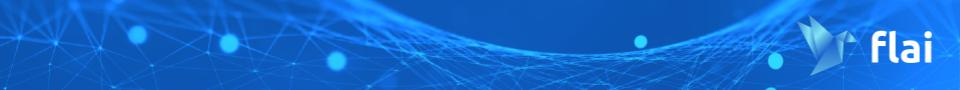

# **Aula 3.1 - Noções de Inferência - Simulação de uma Pesquisa Eleitoral**


## **Primeiro exemplo: Você sabe calcular uma média?**

$$ \mbox{Media}(X_1, ..., X_n) = \frac{1}{n}\sum_{i=1}^nX_i $$ 

In [ ]:
(34 + 33 + 35)/3

34.0

In [ ]:
notas = [9.4, 9.2, 8.1, ... , 1.2]

In [ ]:
200.000.000+

In [ ]:
%%time

import scipy.stats as ss
vetor = ss.poisson.rvs(mu = 5, size = 1_000_000_000)

CPU times: user 9.3 s, sys: 293 ms, total: 9.59 s
Wall time: 9.8 s


In [ ]:
%%time
print('media:', vetor.mean())

media: 5.00003357
CPU times: user 95.8 ms, sys: 872 µs, total: 96.6 ms
Wall time: 98.8 ms


## **Segundo exemplo: Simulação de uma pesquisa eleitoral**

In [ ]:
n = 150_000_000

In [ ]:
cand = ['A', 'B', 'C', 'D']

#real = [0.25, 0.25, 0.25, 0.25]
#real = [0.50, 0.35, 0.10, 0.05]
real = [0.40, 0.30, 0.20, 0.10]

In [ ]:
pa = int(n*real[0])
pb = int(n*real[1])
pc = int(n*real[2])
pd = int(n*real[3])

pop = ['A']*pa + ['B']*pb + ['C']*pc + ['D']*pd

In [ ]:
# desafio numa pesquisa de intenção de votos:
# determinar a distribuição de intenção de votos da população, sem olhar para a população inteira

In [ ]:
import random
S = 500

amostra = random.sample(pop, k = S)

import numpy as np

a = amostra.count('A')/S
b = amostra.count('B')/S
c = amostra.count('C')/S
d = amostra.count('D')/S

estimativas = [a, b, c, d]
erros = np.array(estimativas) - np.array(real)
r = np.all(abs(erros) < 0.02)

print('Estimativas:', estimativas)
print('Erros:', erros)
print('Margem de Erro de +-2%:', r ) 



Estimativas: [0.284, 0.242, 0.23, 0.244]
Erros: [-0.216 -0.108  0.13   0.194]
Margem de Erro de +-2%: False


In [ ]:
Replicas = 1000
S = 3000
res = []
for i in range(Replicas):
    amostra = random.sample(pop, k = S)
    a = amostra.count('A')/S
    b = amostra.count('B')/S
    c = amostra.count('C')/S
    d = amostra.count('D')/S
    estimativas = [a, b, c, d]
    erros = np.array(estimativas) - np.array(real)
    r = np.all(abs(erros) < 0.02) 
    res.append(r)

confianca = np.array(res).mean()
print('Tamanho da População:', n )
print('Tamanho da Amostra:', S )
print('Margem de Erro Estabelecida: 2%')
print('Confiança na Estatística:', confianca)

Tamanho da População: 150000000
Tamanho da Amostra: 3000
Margem de Erro Estabelecida: 2%
Confiança na Estatística: 0.949
